In [43]:
#Repurposed from 2019 summer
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib
import matplotlib.pyplot as plt

In [44]:
NOAA = xr.open_dataset(r'D:\CRI_Modelling_PC\Netcdf Data\NOAA\sst.day.mean.PacCst.1981-2019.nc')

BCC_CSM_BS = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\RegCM\BCC-CSM_TEMPS\BS\BCC-CSM_BS_1966-2005_day_tg.nc")
BCC_CSM_RCP = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\RegCM\BCC-CSM_TEMPS\RCP\BCC-CSM_RCP_2011-2050_day_tg.nc")

ACCESS_BS = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\RegCM\ACCESS_TEMPS\BS\ACCESS_BS_1966-2005_day_tg.nc")
ACCESS_RCP = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\RegCM\ACCESS_TEMPS\RCP\ACCESS_RCP_2011-2050_day_tg.nc")

CCSM4_BS = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\RegCM\CCSM4_TEMPS\BS\CCSM4_BS_1966-2005_day_tg.nc")
CCSM4_RCP = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\RegCM\CCSM4_TEMPS\RCP\CCSM4_RCP_2011-2050_day_tg.nc")

CMCC_BS = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\RegCM\CMCC_TEMPS\BS\CMCC_BS_1966-2005_day_tg.nc")
CMCC_RCP = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\RegCM\CMCC_TEMPS\RCP\CMCC_RCP_2011-2050_day_tg.nc")

FGOALS_BS = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\RegCM\FGOALS_TEMPS\BS\FGOALS_BS_1966-2005_day_tg.nc")
FGOALS_RCP = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\RegCM\FGOALS_TEMPS\RCP\FGOALS_RCP_2011-2050_day_tg.nc")

GFDL_BS = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\RegCM\GFDL_TEMPS\BS\GFDL_BS_1966-2005_day_tg.nc")
GFDL_RCP = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\RegCM\GFDL_TEMPS\RCP\GFDL_RCP_2011-2050_day_tg.nc")

IPSL_BS = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\RegCM\IPSL_TEMPS\BS\IPSL_BS_1966-2005_day_tg.nc")
IPSL_RCP = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\RegCM\IPSL_TEMPS\RCP\IPSL_RCP_2011-2050_day_tg.nc")

MIROC5_BS = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\RegCM\MIROC5_TEMPS\BS\MIROC5_BS_1966-2005_day_tg.nc")
MIROC5_RCP = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\RegCM\MIROC5_TEMPS\RCP\MIROC5_RCP_2011-2050_day_tg.nc")

MPI_BS = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\RegCM\MPI_TEMPS\BS\MPI_BS_1966-2005_day_tg.nc")
MPI_RCP = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\RegCM\MPI_TEMPS\RCP\MPI_RCP_2011-2050_day_tg.nc")

MRI_BS = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\RegCM\MRI_TEMPS\BS\MRI_BS_1966-2005_day_tg.nc")
MRI_RCP = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\RegCM\MRI_TEMPS\RCP\MRI_RCP_2011-2050_day_tg.nc")

NorESM_BS = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\RegCM\NorESM_TEMPS\BS\NorESM_BS_1966-2005_day_tg.nc")
NorESM_RCP = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\RegCM\NorESM_TEMPS\RCP\NorESM_RCP_2011-2050_day_tg.nc")

LandMask = xr.open_dataset(r'D:\CRI_Modelling_PC\Netcdf Data\mask_new.nc').mask

In [45]:
BS_list = [ACCESS_BS, BCC_CSM_BS, CCSM4_BS, CMCC_BS, FGOALS_BS, MIROC5_BS, MRI_BS, NorESM_BS]
RCP_list = [ACCESS_RCP, BCC_CSM_RCP, CCSM4_RCP, CMCC_RCP, FGOALS_RCP, MIROC5_RCP, MRI_RCP, NorESM_RCP]

In [46]:
lat = BCC_CSM_BS.xlat.data
lon = BCC_CSM_BS.xlon.data

NOAA_lat = NOAA.lat.data
NOAA_lon = NOAA.lon.data


NOAA_years = np.where((pd.DatetimeIndex(NOAA.time.data).year>=1982) & (pd.DatetimeIndex(NOAA.time.data).year<=2018))
NOAA_short = NOAA.sst[(NOAA_years[0]),:,:]

In [47]:
min_Temp = 20
max_Temp = 24

NOAA_Mask  = NOAA.sst.where(NOAA.sst.isnull(), 1)
#Instead of counting total days we count consequitive days in every year
NOAA_Count = NOAA_short.where((NOAA_short <= max_Temp) & (NOAA_short >= min_Temp)).groupby('time.year').count(dim='time')
count_Mean = NOAA_Count.mean(dim="year")
NOAA_Final = count_Mean*NOAA_Mask[0,:,:]

In [48]:
average_BS_dict = {}
for model in range(len(BS_list)):
    BS_count = BS_list[model].tg.where((BS_list[model].tg<=max_Temp) & (BS_list[model].tg>=min_Temp)).groupby('time.year').count(dim='time')
    average_BS_dict[model]  = BS_count.mean(dim="year").where(LandMask==0)

average_RCP_dict = {}
for model in range(len(RCP_list)):
    RCP_count = RCP_list[model].tg.where((RCP_list[model].tg<=max_Temp) & (RCP_list[model].tg>=min_Temp)).groupby('time.year').count(dim='time')
    average_RCP_dict[model] = RCP_count.mean(dim="year").where(LandMask==0)

In [49]:
BS_sum = average_BS_dict[0]*0
for x in average_BS_dict.values():
    BS_sum += x.data
    
avg_BS = BS_sum/len(BS_list)
RCP_sum = average_RCP_dict[0]*0
for x in average_RCP_dict.values():
    RCP_sum += x.data
    
avg_RCP = RCP_sum/len(RCP_list)



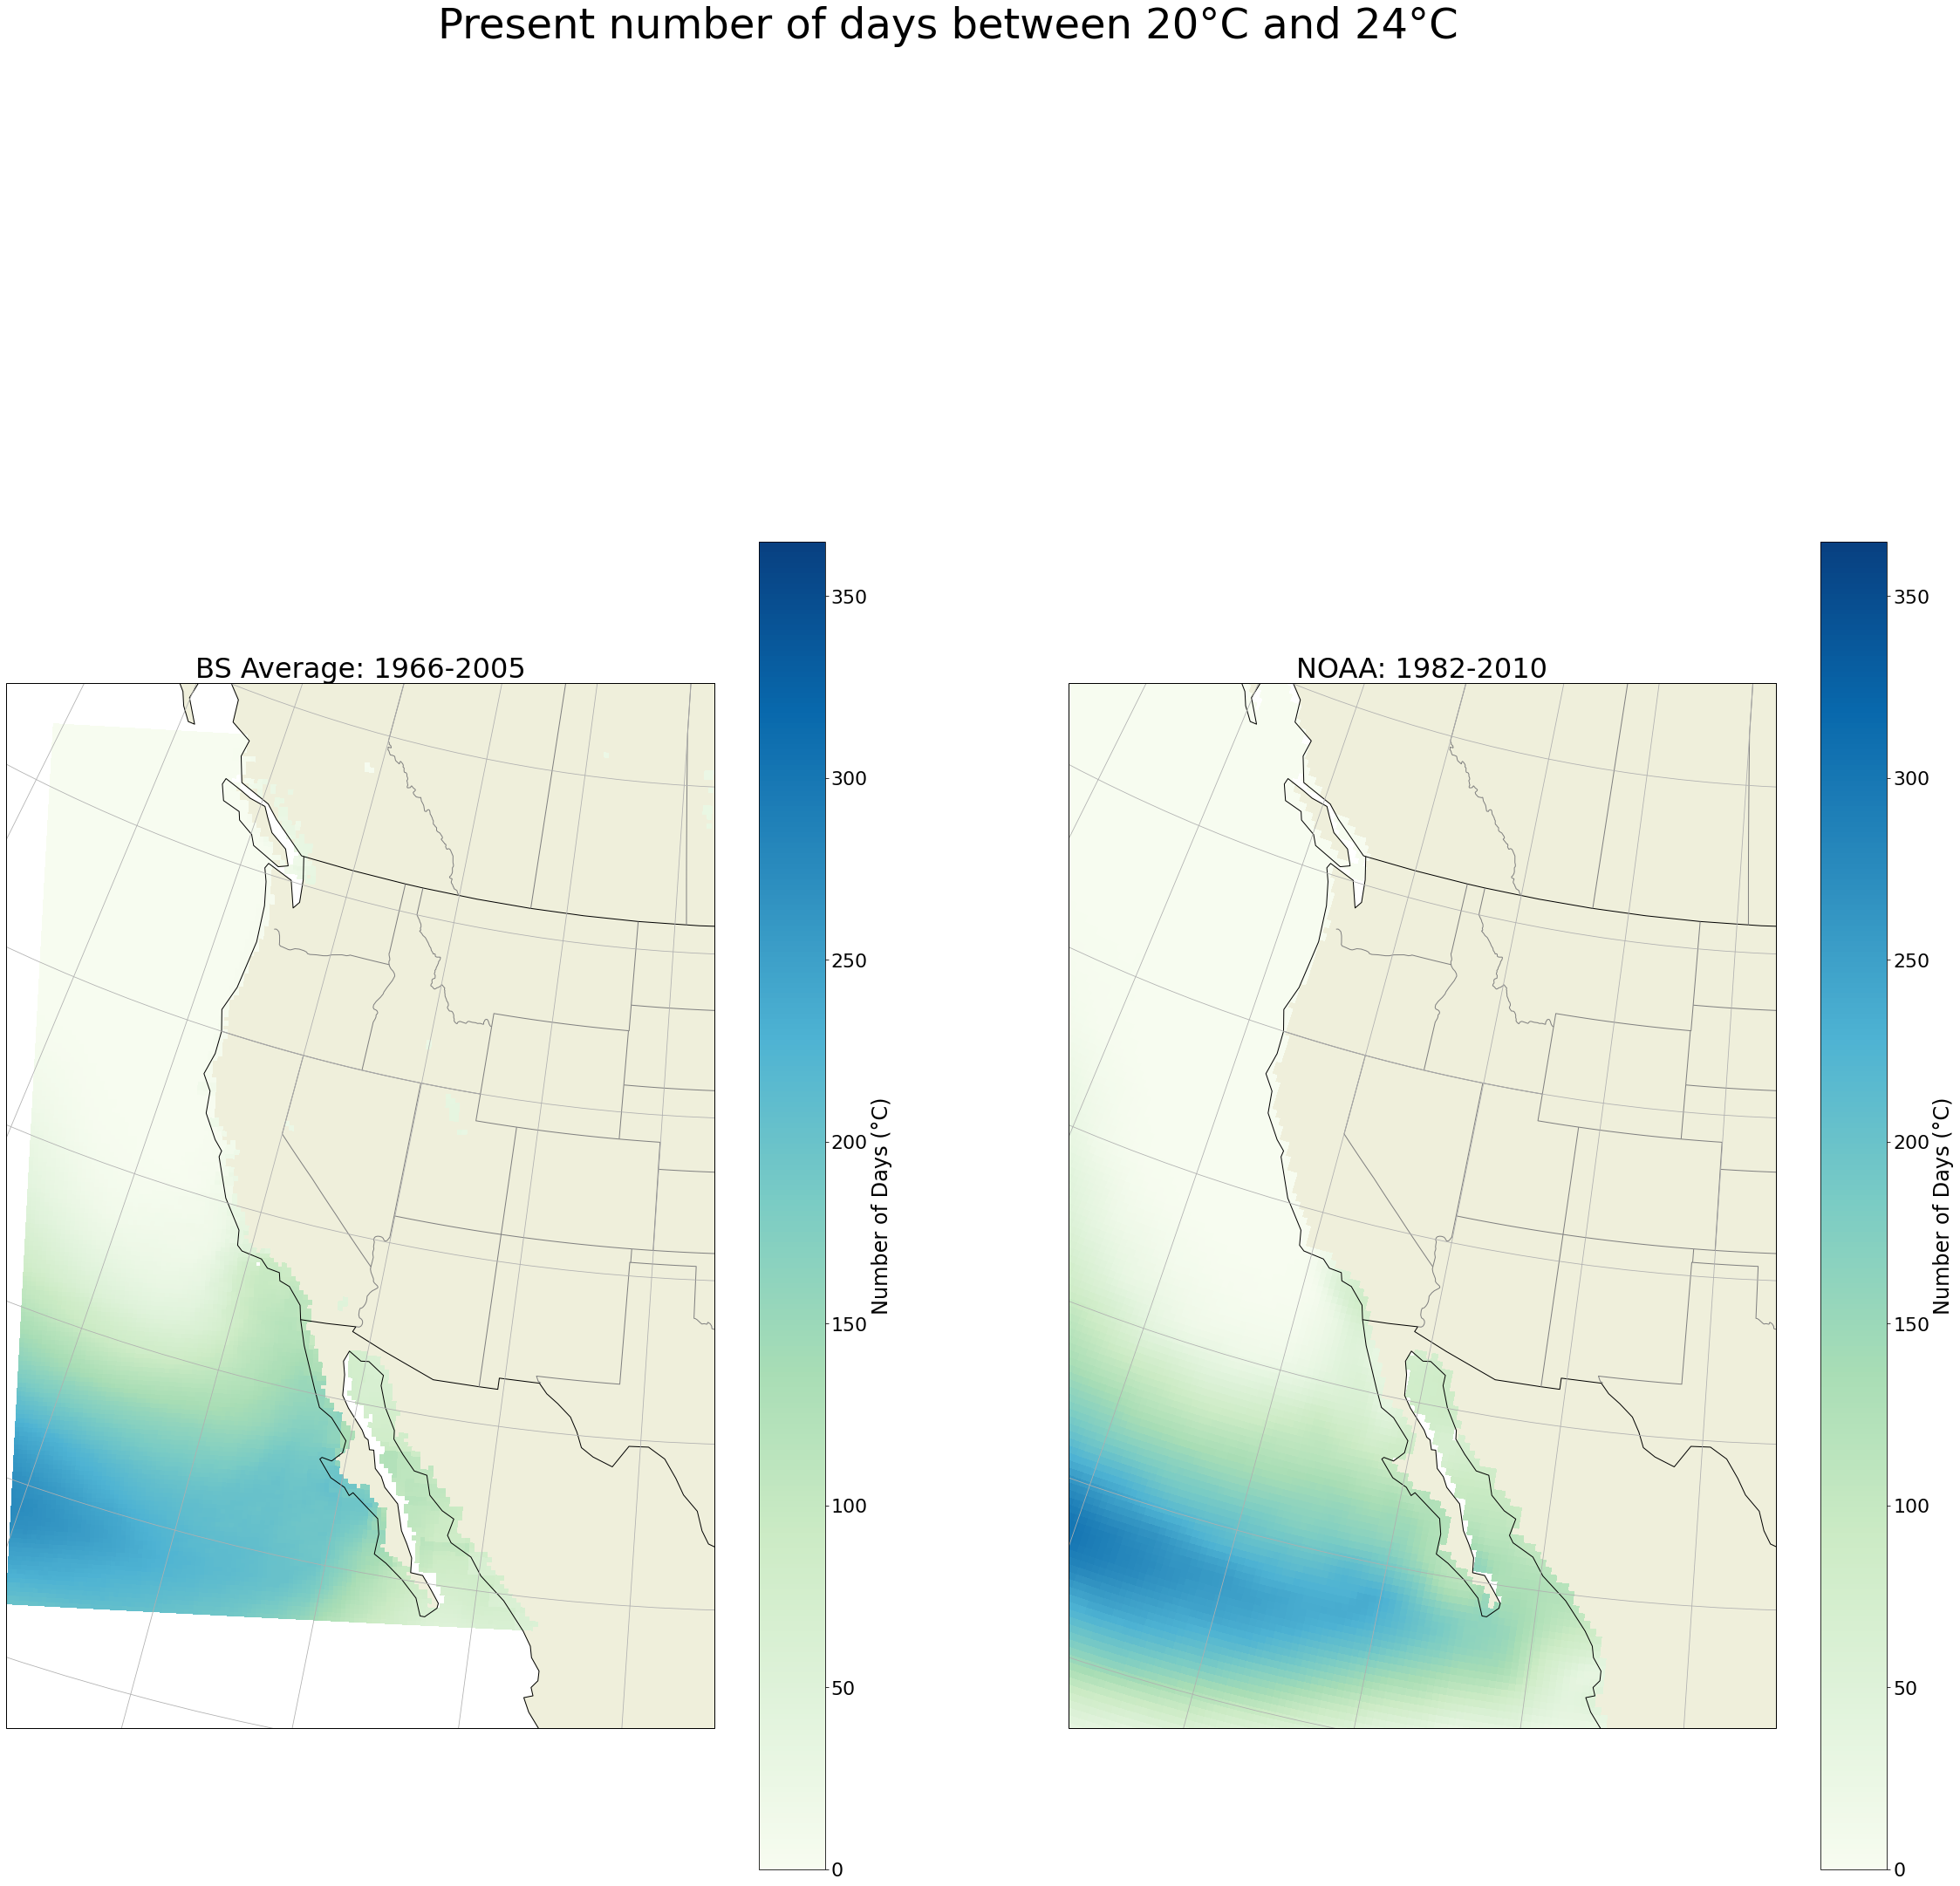

In [50]:
# Plotting Present
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

fig2 = plt.figure(figsize=[40,40])
fig2.suptitle('Present number of days between ' + str(min_Temp) + '\u00b0C and ' + str(max_Temp) + '\u00b0C', fontsize=48)

plotBS_avg = fig2.add_subplot(1,2,1,projection=crs.LambertConformal())
plotBS_avg.set_title('BS Average: 1966-2005',fontsize=32)
plotBS_avg.set_extent([lon[0,0], lon[-1,-1], lat[0, 0], lat[-1,-1]], crs.Geodetic())
diff_cont_BS_avg = plotBS_avg.pcolormesh(lon, lat, avg_BS,
             transform=crs.PlateCarree(),
             cmap='GnBu',vmax=365,vmin=0)
plotBS_avg.add_feature(cfeature.COASTLINE)
plotBS_avg.add_feature(cfeature.LAND)
plotBS_avg.add_feature(cfeature.BORDERS)
plotBS_avg.add_feature(states_provinces, edgecolor='gray')
plotBS_avg.gridlines()

colorbar1 = fig2.colorbar(diff_cont_BS_avg, shrink=0.7, anchor=('SW'))
colorbar1.set_label('Number of Days (\u00b0C)',fontsize=24)
colorbar1.ax.tick_params(labelsize=22)

plotRCP_avg = fig2.add_subplot(1,2,2,projection=crs.LambertConformal())
plotRCP_avg.set_title('NOAA: 1982-2010',fontsize=32)
plotRCP_avg.set_extent([lon[0,0], lon[-1,-1], lat[0, 0], lat[-1,-1]], crs.Geodetic())
diff_cont_RCP_avg = plotRCP_avg.pcolormesh(NOAA_lon, NOAA_lat, NOAA_Final.data,
             transform=crs.PlateCarree(),
             cmap='GnBu',vmax=365,vmin=0)
plotRCP_avg.add_feature(cfeature.COASTLINE)
plotRCP_avg.add_feature(cfeature.LAND)
plotRCP_avg.add_feature(cfeature.BORDERS)
plotRCP_avg.add_feature(states_provinces, edgecolor='gray')
plotRCP_avg.gridlines()

colorbar3 = fig2.colorbar(diff_cont_RCP_avg, shrink=0.7, anchor=('SW'))
colorbar3.set_label('Number of Days (\u00b0C)',fontsize=24)
colorbar3.ax.tick_params(labelsize=22)


fig2.savefig(r"D:\CRI_Modelling_PC\CRI Maps\HAB 2020\Present vs NOAA.jpeg", bbox_inches='tight')

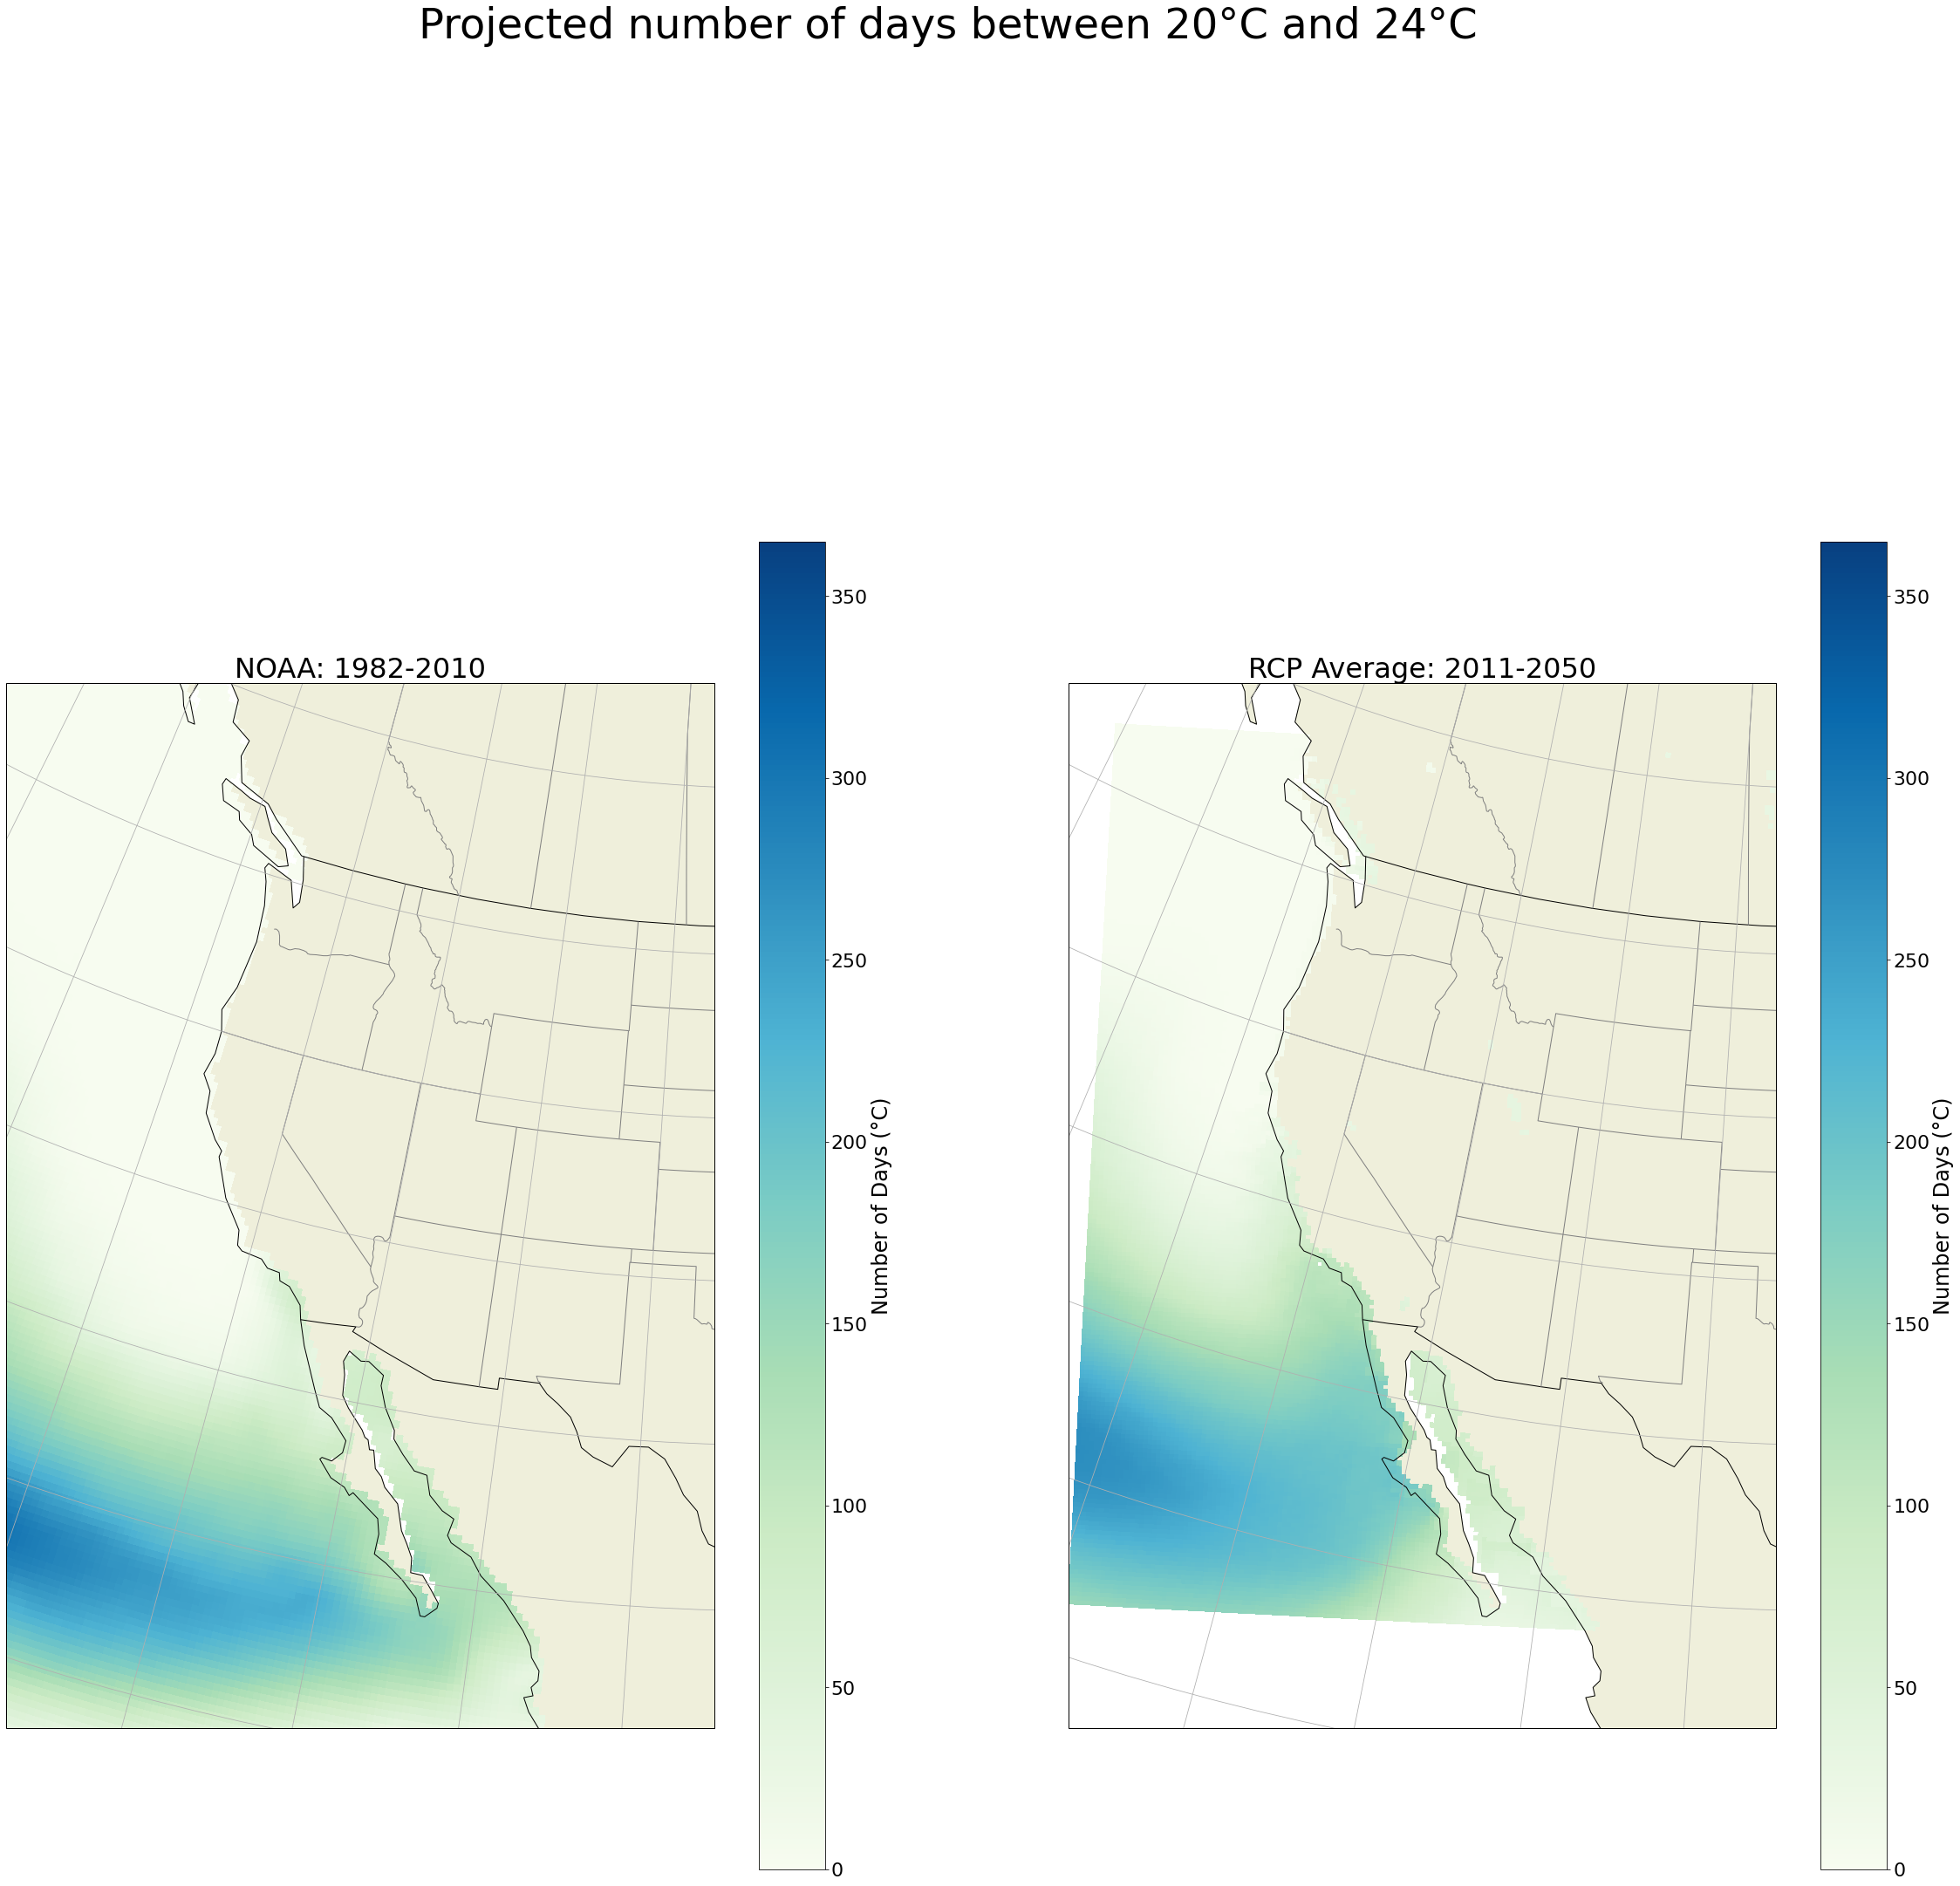

In [51]:
# Plotting Present
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

fig3 = plt.figure(figsize=[40,40])
fig3.suptitle('Projected number of days between ' + str(min_Temp) + '\u00b0C and ' + str(max_Temp) + '\u00b0C', fontsize=48)

plotRCP_avg = fig3.add_subplot(1,2,1,projection=crs.LambertConformal())
plotRCP_avg.set_title('NOAA: 1982-2010',fontsize=32)
plotRCP_avg.set_extent([lon[0,0], lon[-1,-1], lat[0, 0], lat[-1,-1]], crs.Geodetic())
diff_cont_RCP_avg = plotRCP_avg.pcolormesh(NOAA_lon, NOAA_lat, NOAA_Final.data,
             transform=crs.PlateCarree(),
             cmap='GnBu',vmax=365,vmin=0)
plotRCP_avg.add_feature(cfeature.COASTLINE)
plotRCP_avg.add_feature(cfeature.LAND)
plotRCP_avg.add_feature(cfeature.BORDERS)
plotRCP_avg.add_feature(states_provinces, edgecolor='gray')
plotRCP_avg.gridlines()

colorbar3 = fig3.colorbar(diff_cont_BS_avg, shrink=0.7, anchor=('SW'))
colorbar3.set_label('Number of Days (\u00b0C)',fontsize=24)
colorbar3.ax.tick_params(labelsize=22)


plotRCP_avg = fig3.add_subplot(1,2,2,projection=crs.LambertConformal())
plotRCP_avg.set_title('RCP Average: 2011-2050',fontsize=32)
plotRCP_avg.set_extent([lon[0,0], lon[-1,-1], lat[0, 0], lat[-1,-1]], crs.Geodetic())
diff_cont_RCP_avg = plotRCP_avg.pcolormesh(lon, lat, avg_RCP,
             transform=crs.PlateCarree(),
             cmap='GnBu',vmax=365,vmin=0)
plotRCP_avg.add_feature(cfeature.COASTLINE)
plotRCP_avg.add_feature(cfeature.LAND)
plotRCP_avg.add_feature(cfeature.BORDERS)
plotRCP_avg.add_feature(states_provinces, edgecolor='gray')
plotRCP_avg.gridlines()


colorbar4 = fig3.colorbar(diff_cont_RCP_avg, shrink=0.7, anchor=('SW'))
colorbar4.set_label('Number of Days (\u00b0C)',fontsize=24)
colorbar4.ax.tick_params(labelsize=22)


fig3.savefig(r"D:\CRI_Modelling_PC\CRI Maps\HAB 2020\Projected vs NOAA.jpeg", bbox_inches='tight')